In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('drive/MyDrive/Kisi kisi LKS/data_student.csv')
df.info()

#Jumlah Atribut : 6 (Termasuk Kelas Target)

# Informasi Atribut
# STG : Tingkat waktu belajar untuk target pembelajaran tertentu (rentang nilai antara 0.00 - 1.00)
# SCG : Tingkat jumlah pengulangan untuk target pembelajaran tertentu (rentang nilai antara 0.00 - 1.00)
# STR : Tingkat waktu belajar untuk materi yang berkaitan dengan target pembelajaran tertentu (rentang nilai antara 0.00 - 1.00)
# LPR : Performa ujian untuk materi yang berkaitan dengan target pembelajaran tertentu(rentang nilai antara 0.00 - 1.00)
# PEG : Performa ujian untuk target pembelajaran tertentu (rentang nilai antara 0.00 - 1.00)
# UNS : Tingkat pengetahuan pengguna (Very Low, Low, Middle, High)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [ ]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [ ]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [ ]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [ ]:
df[' UNS'].value_counts()

Middle      88
Low         83
High        63
very_low    24
Name:  UNS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


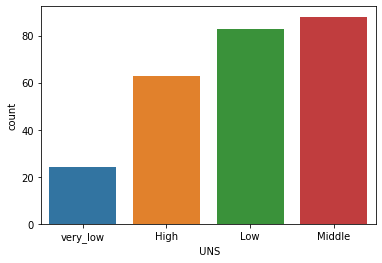

In [ ]:
sns.countplot(df[' UNS'], label="df")

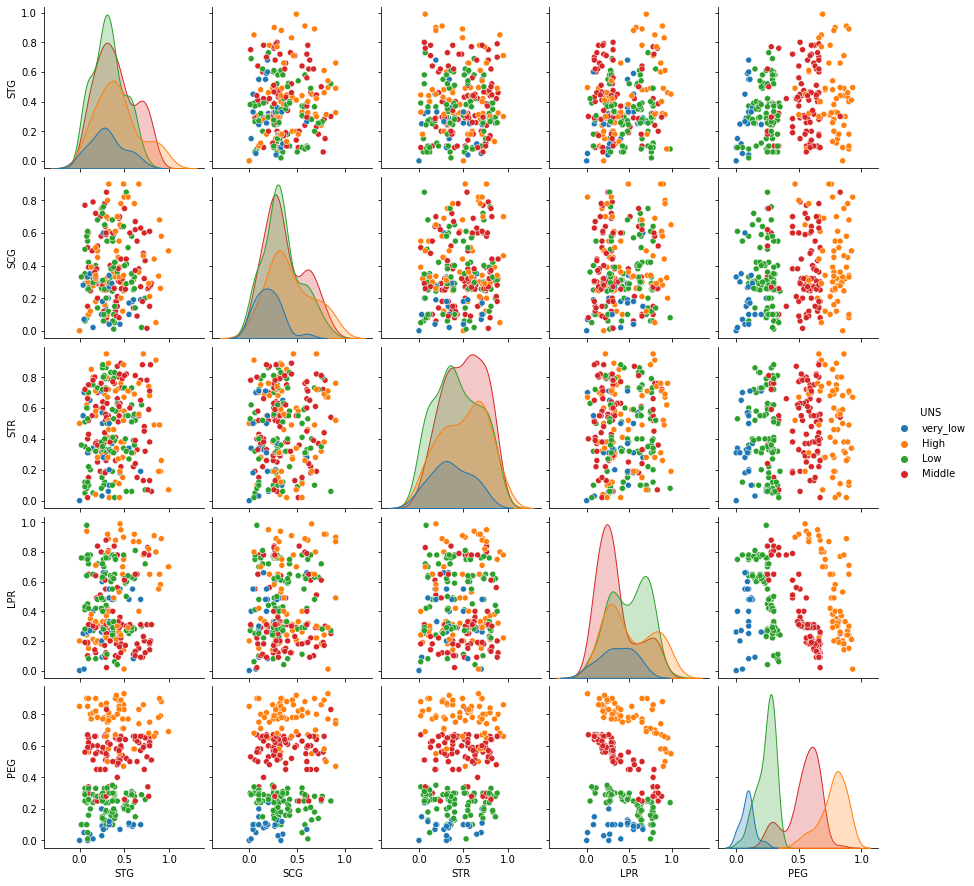

In [ ]:
sns.pairplot(df, hue=" UNS", height=2.5)
plt.tittle=(' UNS')

In [ ]:
label_encoder = LabelEncoder()
df[' UNS'] = label_encoder.fit_transform(df[' UNS'])
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


In [ ]:
from sklearn.cluster import KMeans

# ambil kolom yang akan dianalisa data nya PEG dan STG dan gunakan method elbow
X = df[['STG' , 'PEG']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


In [ ]:
X = df[['Alcohol', 'Proline']]
inertia = []

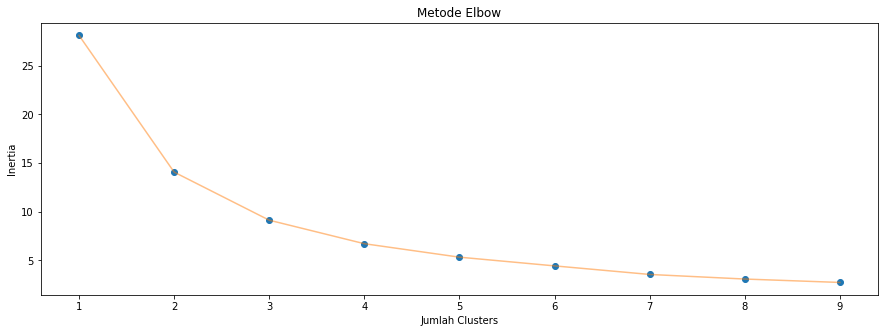

In [ ]:
# plot 

plt.figure(figsize=(15,5))
plt.plot(np.arange(1,10), inertia,  'o')
plt.plot(np.arange(1,10), inertia, '-', alpha=0.5)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[[0.71452381 0.61690476]
 [0.30986325 0.21284615]
 [0.29789899 0.68171717]]
9.132280208680207
6


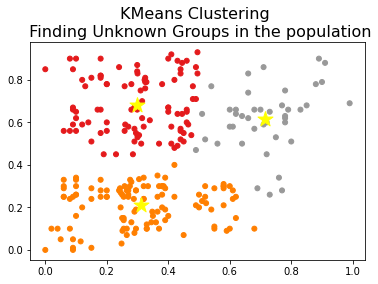

In [ ]:
# nilai elbow nya adalah 3 (ada 3 cluster)

kmeans = KMeans(n_clusters=3, n_init = 10, init="k-means++", random_state=111, max_iter=300,tol=0.0001, algorithm="elkan")
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# visualisasi hasil dari cluster 
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, cmap="Set1_r", s=25)
# centroid data 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='yellow', marker="*", s=250)
plt.title("KMeans Clustering \n Finding Unknown Groups in the population", fontsize=16)
plt.show()